This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following variables as explanatory variables:
ID: Unique ID of each client
LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
Gender: 1 = male; 2 = female
Education: 1 = graduate school; 2 = university; 3 = high school; 4 = others
Marital status: 1 = married; 2 = single; 3 = others).
Age: Age in years

## History of past payment.

We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
PAY_0: Repayment status in September, 2005

PAY_2: Repayment status in August, 2005

PAY_3: Repayment status in July, 2005

PAY_4: Repayment status in June, 2005

PAY_5: Repayment status in May, 2005

PAY_6: Repayment status in April, 2005

Amount of bill statement (NT dollar).
BILL_AMT1: Amount of bill statement in September, 2005

BILL_AMT2: Amount of bill statement in August, 2005

BILL_AMT3: Amount of bill statement in July, 2005

BILL_AMT4: Amount of bill statement in June, 2005

BILL_AMT5: Amount of bill statement in May, 2005

BILL_AMT6: Amount of bill statement in April, 2005

Amount of previous payment (NT dollar).
PAY_AMT1: Amount of previous payment in September, 2005

PAY_AMT2: Amount of previous payment in August, 2005

PAY_AMT3: Amount of previous payment in July, 2005

PAY_AMT4: Amount of previous payment in June, 2005
PAY_AMT5: Amount of previous payment in May, 2005

PAY_AMT6: Amount of previous payment in April, 2005

default.payment.next.month: Default payment (1=yes, 0=no)

**Importing the required libraries**

In [93]:
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing the Dataset

In [6]:
df=pd.read_csv('/content/UCI_Credit_Card.csv')

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Data Cleaning

In [8]:
df.shape

(30000, 25)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [11]:
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Data Description

In [12]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

Data Preprocessing

Changing the names according to the given Months

In [13]:
df.rename(columns={'default.payment.next.month' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [14]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


Replacing values with there labels

In [15]:
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,Female,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,2,120000.0,Female,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,3,90000.0,Female,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,4,50000.0,Female,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,5,50000.0,Male,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No


**Exploratory Data Analysis**

IsDefaulter

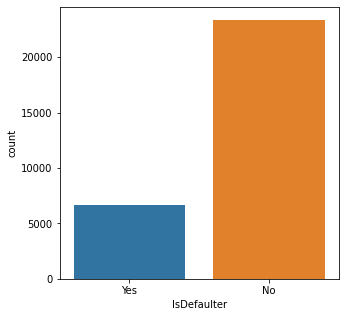

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'IsDefaulter', data = df)

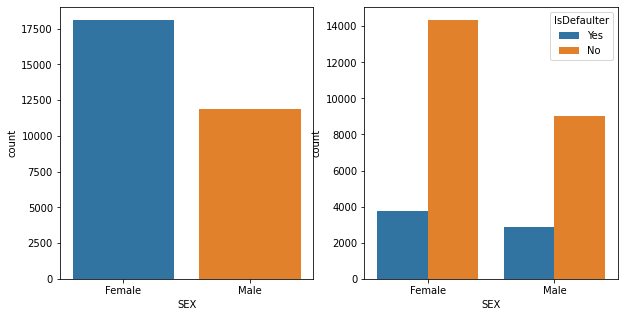

In [18]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'SEX', ax = axes[0], data = df)
sns.countplot(x = 'SEX', hue = 'IsDefaulter',ax = axes[1], data = df)

EDUCATION

In [19]:
df['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
5                    280
Others               123
6                     51
0                     14
Name: EDUCATION, dtype: int64

Here 5,6 nd 0 are unknown so lets replace it as 'Others'

In [20]:
df['EDUCATION']=df.EDUCATION.replace({5: "Others", 6: "Others", 0: "Others"})

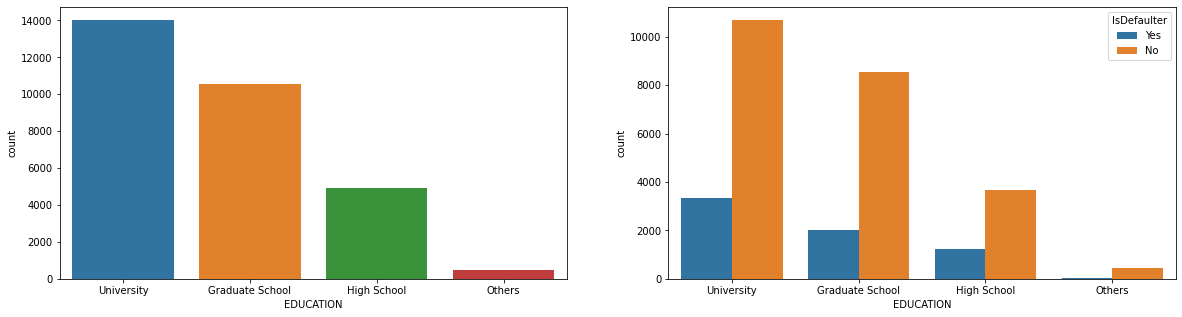

In [21]:
fig, axes=plt.subplots(ncols=2,figsize=(20,5))
sns.countplot(x='EDUCATION', ax=axes[0], data=df)
sns.countplot(x='EDUCATION', hue='IsDefaulter', ax=axes[1], data=df)

MARRIAGE

In [22]:
df['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       323
0             54
Name: MARRIAGE, dtype: int64

In [23]:
#Replacing 0 with 'Others'
df.MARRIAGE=df.MARRIAGE.replace({0:"Others"})

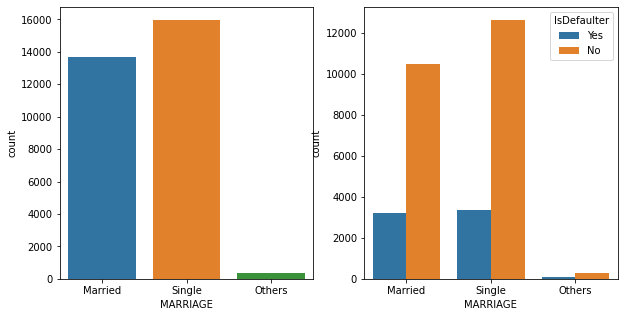

In [24]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
sns.countplot(x = 'MARRIAGE', ax = axes[0], data = df)
sns.countplot(x = 'MARRIAGE', hue = 'IsDefaulter',ax = axes[1], data = df)

AGE

In [25]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

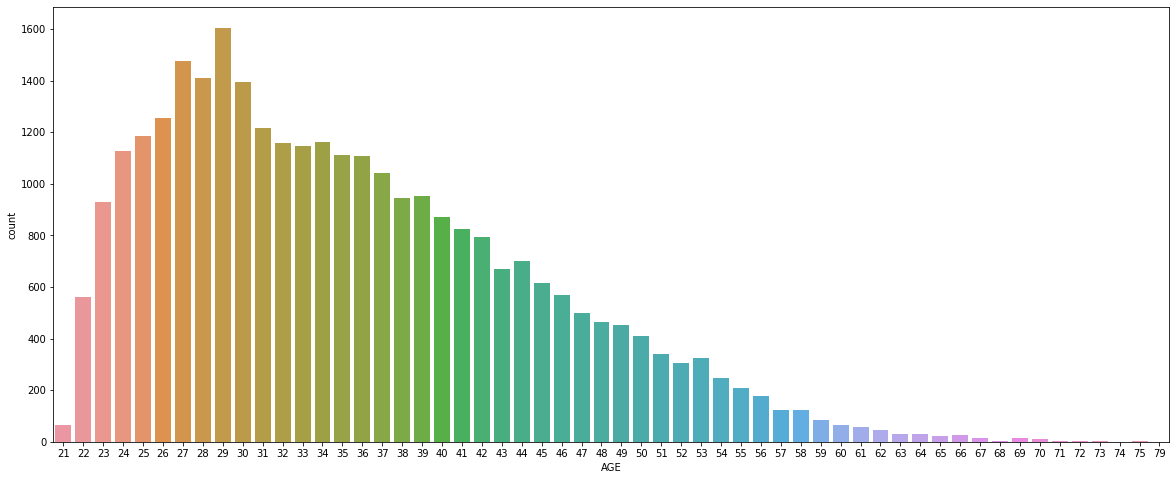

In [26]:
plt.figure(figsize=(20,8))
sns.countplot(x='AGE',data=df)

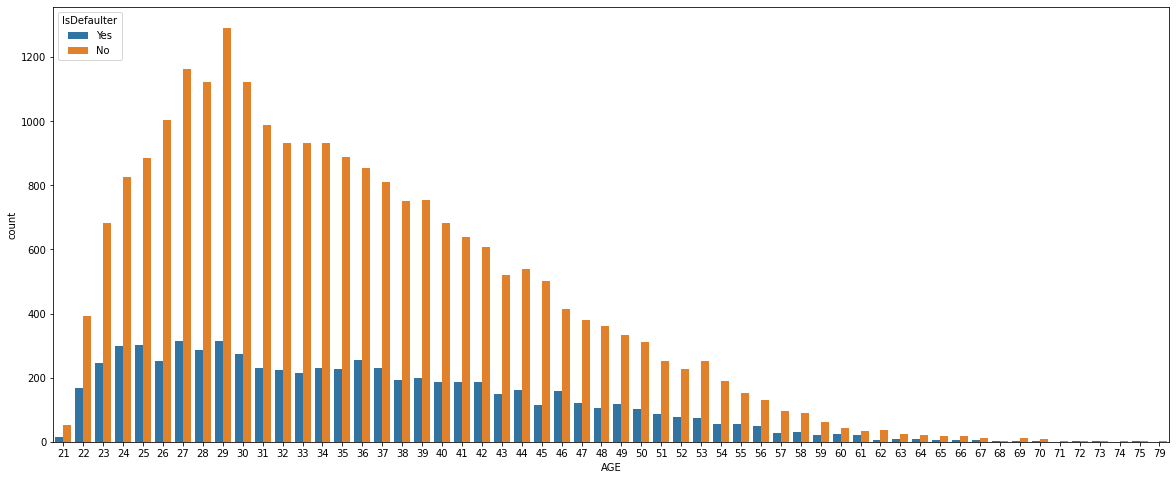

In [27]:
plt.figure(figsize=(20,8))
sns.countplot(x='AGE', hue='IsDefaulter', data=df)

Label Incoding

In [28]:
encoders_nums = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1, "No":0}}
df = df.replace(encoders_nums)

In [29]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000.0,0,University,Married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,0,University,Single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,0,University,Single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,0,University,Married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,University,Married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


One Hot Encoding

In [30]:
df=pd.get_dummies(df, columns=['EDUCATION','MARRIAGE'])

In [31]:
df.shape

(30000, 30)

In [32]:
df.drop(['EDUCATION_Others', 'MARRIAGE_Others'], axis=1, inplace=True)

In [33]:
df.shape

(30000, 28)

In [34]:
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [35]:
#shape of dataset after creating dummy variables
df.shape

(30000, 80)

In [36]:
df.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,...,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,...,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,...,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,...,0,0,1,0,0,0,0,0,0,0


**Handling Class Imbalance**

SMOTE - Synthetic Minority Oversampling Technique

In [37]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()

In [38]:
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])
print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


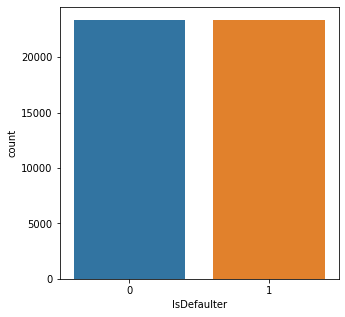

In [39]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

#check for class imbalance
plt.figure(figsize=(5,5))
sns.countplot('IsDefaulter', data = balanced_df)

In [40]:
balanced_df.shape

(46728, 80)

In [41]:
#Removing the reature ID from the dataset
balanced_df.drop('ID', axis=1, inplace=True)
balanced_df.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
0,20000.0,0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,120000.0,0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,...,0,0,1,0,0,0,0,0,0,1
2,90000.0,0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,...,0,1,0,0,0,0,0,0,0,0
3,50000.0,0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,...,0,1,0,0,0,0,0,0,0,0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,...,0,1,0,0,0,0,0,0,0,0


In [42]:
#Displaying the columns and rows display upto 100
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
balanced_df.corr()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,EDUCATION_Graduate School,EDUCATION_High School,EDUCATION_University,MARRIAGE_Married,MARRIAGE_Single,PAY_SEPT_-1,PAY_SEPT_0,PAY_SEPT_1,PAY_SEPT_2,PAY_SEPT_3,PAY_SEPT_4,PAY_SEPT_5,PAY_SEPT_6,PAY_SEPT_7,PAY_SEPT_8,PAY_AUG_-1,PAY_AUG_0,PAY_AUG_1,PAY_AUG_2,PAY_AUG_3,PAY_AUG_4,PAY_AUG_5,PAY_AUG_6,PAY_AUG_7,PAY_AUG_8,PAY_JUL_-1,PAY_JUL_0,PAY_JUL_1,PAY_JUL_2,PAY_JUL_3,PAY_JUL_4,PAY_JUL_5,PAY_JUL_6,PAY_JUL_7,PAY_JUL_8,PAY_JUN_-1,PAY_JUN_0,PAY_JUN_1,PAY_JUN_2,PAY_JUN_3,PAY_JUN_4,PAY_JUN_5,PAY_JUN_6,PAY_JUN_7,PAY_JUN_8,PAY_MAY_-1,PAY_MAY_0,PAY_MAY_2,PAY_MAY_3,PAY_MAY_4,PAY_MAY_5,PAY_MAY_6,PAY_MAY_7,PAY_MAY_8,PAY_APR_-1,PAY_APR_0,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8,IsDefaulter
LIMIT_BAL,1.000000,0.003753,0.157312,0.310031,0.301690,0.303523,0.309754,0.311984,0.304413,0.194204,0.180162,0.208510,0.209026,0.211409,0.222744,0.288361,-0.098121,-0.116522,0.135393,-0.047785,0.153346,-0.024099,-0.017022,-0.113589,-0.060031,-0.025671,-1.510446e-02,-0.006427,-0.000886,-0.008002,0.176568,-0.057612,0.006952,-0.169225,-0.048871,-0.034689,-0.012875,-0.003005,-0.008817,-0.004178,0.177934,-0.068256,0.011509,-0.156577,-0.052934,-0.025009,-0.003976,-0.012062,-0.020663,-0.007237,0.162610,-0.062496,1.151916e-02,-0.150306,-0.044339,-0.023688,-0.012873,-0.008685,-0.042971,-5.908948e-03,0.153101,-0.063037,-0.131583,-0.046710,-0.026573,-0.009288,-0.003758,-0.043507,-0.004546,0.154375,-0.058644,-0.131266,-0.040296,-0.026513,-0.006087,-0.011120,-0.036886,-0.004608,-1.949720e-01
SEX,0.003753,1.000000,0.081054,0.032948,0.029782,0.022113,0.018885,0.015109,0.013620,0.018585,0.016190,0.022263,0.016908,0.014463,0.014275,0.068025,0.048600,0.017885,0.020780,0.081071,0.018801,0.102736,0.032166,0.002932,0.033579,0.021077,1.855185e-02,0.007251,0.006858,0.008706,0.010217,0.094552,0.009193,0.020515,0.026505,0.024203,0.011652,0.008870,0.009979,-0.003205,0.016073,0.080857,0.013357,0.025196,0.028337,0.018712,0.006882,0.008511,0.005481,0.011567,0.012821,0.078099,9.444507e-03,0.015239,0.031837,0.018402,0.010425,0.001674,0.010690,9.444507e-03,0.015137,0.074107,0.009368,0.026374,0.020987,0.005964,0.013357,0.011046,0.006678,0.012228,0.066084,0.007261,0.026259,0.012770,0.010375,0.012189,0.004437,0.009445,-1.315762e-01
AGE,0.157312,0.081054,1.000000,0.053452,0.050817,0.050853,0.048995,0.047780,0.045236,0.027519,0.022517,0.023639,0.019543,0.017830,0.020793,-0.073091,0.199888,-0.078160,0.405753,-0.411350,0.031450,-0.038983,0.003222,-0.001409,-0.006597,0.000146,1.662064e-03,0.003322,0.005933,0.001245,0.039534,-0.049905,-0.001269,-0.014296,-0.008377,0.004684,-0.000043,0.002657,0.003626,-0.006016,0.038388,-0.050218,-0.000479,-0.014554,-0.000498,-0.006582,0.001767,0.000327,-0.001526,0.002011,0.038425,-0.057957,1.146422e-03,-0.008033,-0.001159,-0.004507,0.001976,-0.010635,-0.000461,7.750733e-04,0.037576,-0.049041,-0.015876,0.006062,-0.002012,-0.002262,-0.006256,-0.000390,0.006062,0.037327,-0.038678,-0.017343,-0.009366,-0.004980,0.000447,-0.002482,0.010450,0.002260,4.443371e-03
BILL_AMT_SEPT,0.310031,0.032948,0.053452,1.000000,0.963471,0.916632,0.884807,0.854826,0.828120,0.165065,0.115748,0.172083,0.183816,0.187245,0.208679,-0.024986,-0.018514,0.031043,0.031701,-0.011671,-0.225860,0.288272,-0.109556,0.068335,-0.023447,0.008863,9.910220e-03,0.007811,0.019795,0.017439,-0.244705,0.322337,0.005379,0.004044,-0.002464,0.002137,0.009040,0.018844,0.016727,-0.001521,-0.231521,0.341374,0.007996,-0.011003,-0.010658,0.005968,0.011234,0.013256,-0.017068,-0.003895,-0.210046,0.343917,1.333383e-02,-0.007513,-0.005432,-0.001118,0.006389,-0.002975,-0.029612,-2.195265e-03,-0.198027,0.325241,0.012085,-0.013821,0.000505,-0.005371,0.003542,-0.030576,-0.003001,-0.194480,0.331737,0.011600,-0.013656,-0.011039,-0.001227,-0.002878,-0.027458,-0.001121,-2.533422e-02
BILL_AMT_AUG,0.301690,0.029782,0.050817,0.963471,1.0000

In [43]:
#Seperating dependant and independant variabales
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [44]:
X.shape

(46728, 78)

In [45]:
y.shape

(46728,)

Data Transformation

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

Train Test Splitting

In [47]:
#Splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [48]:
X_train.shape

(37382, 78)

In [49]:
X_test.shape

(9346, 78)

**Baseline Model Implementation**

Logistic Regression Model

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
logi = LogisticRegression()
logi.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [51]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [52]:
#getting the scores for Logistic Regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 2)
print("The accuracy on train data is ", train_accuracy_logi)

accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 2)
print("The accuracy on test data is ", accuracy_logi)

precision_score_logi = round(precision_score(y_pred_logi,y_test), 2)
print("The precision on test data is ", precision_score_logi)

recall_score_logi = round(recall_score(y_pred_logi,y_test), 2)
print("The recall on test data is ", recall_score_logi)

f1_score_logi = round(f1_score(y_pred_logi,y_test), 2)
print("The f1 on test data is ", f1_score_logi)

roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 2)
print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.83
The accuracy on test data is  0.83
The precision on test data is  0.8
The recall on test data is  0.86
The f1 on test data is  0.83
The roc_score on test data is  0.83


[[4055  618]
 [ 939 3734]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

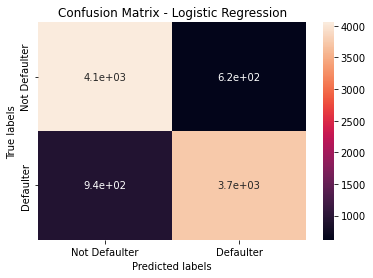

In [53]:
# Get the confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Decision Tree Classification

In [54]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
#class prediction of y
y_pred_dtc=dtc.predict(X_test)
y_train_pred_dtc=dtc.predict(X_train)

In [56]:
#getting the scores for Decision Tree Classifier
train_accuracy_dtc = round(accuracy_score(y_train_pred_dtc,y_train), 2)
print("The accuracy on train data is ", train_accuracy_dtc)

accuracy_dtc = round(accuracy_score(y_pred_dtc,y_test), 2)
print("The accuracy on test data is ", accuracy_dtc)

precision_score_dtc = round(precision_score(y_pred_dtc,y_test), 2)
print("The precision on test data is ", precision_score_dtc)

recall_score_dtc = round(recall_score(y_pred_dtc,y_test), 2)
print("The recall on test data is ", recall_score_dtc)

f1_score_dtc = round(f1_score(y_pred_dtc,y_test), 2)
print("The f1 on test data is ", f1_score_dtc)

roc_score_dtc = round(roc_auc_score(y_pred_dtc,y_test), 2)
print("The roc_score on test data is ", roc_score_dtc)

The accuracy on train data is  1.0
The accuracy on test data is  0.8
The precision on test data is  0.82
The recall on test data is  0.79
The f1 on test data is  0.8
The roc_score on test data is  0.8


[[3686  987]
 [ 861 3812]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

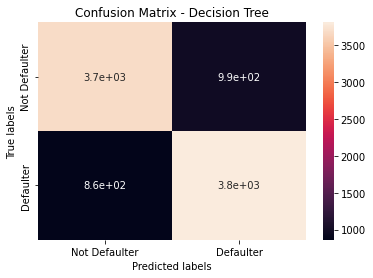

In [57]:
# Get the confusion matrix for decision tree classifier
labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_test, y_pred_dtc )
print(cm_dtc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Random Forest Classification

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=50)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [59]:
#class prediction of y
y_pred_rfc=rfc.predict(X_test)
y_train_pred_rfc=rfc.predict(X_train)

In [60]:
#getting the scores for Random Forest Classifier
train_accuracy_rfc = round(accuracy_score(y_train_pred_rfc,y_train), 2)
print("The accuracy on train data is ", train_accuracy_rfc)

accuracy_rfc = round(accuracy_score(y_pred_rfc,y_test), 2)
print("The accuracy on test data is ", accuracy_rfc)

precision_score_rfc = round(precision_score(y_pred_rfc,y_test), 2)
print("The precision on test data is ", precision_score_rfc)

recall_score_rfc = round(recall_score(y_pred_rfc,y_test), 2)
print("The recall on test data is ", recall_score_rfc)

f1_score_rfc = round(f1_score(y_pred_rfc,y_test), 2)
print("The f1 on test data is ", f1_score_rfc)

roc_score_rfc = round(roc_auc_score(y_pred_rfc,y_test), 2)
print("The roc_score on test data is ", roc_score_rfc)

The accuracy on train data is  1.0
The accuracy on test data is  0.87
The precision on test data is  0.83
The recall on test data is  0.9
The f1 on test data is  0.86
The roc_score on test data is  0.87


[[4236  437]
 [ 800 3873]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

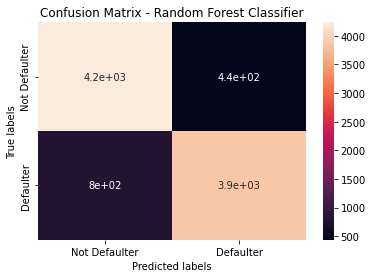

In [61]:
# Get the confusion matrix for Random Forest Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_test, y_pred_rfc )
print(cm_rfc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Support Vector Machine

In [62]:
from sklearn.svm import SVC

In [63]:
svm=SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

In [64]:
#class prediction of y
y_pred_svm=svm.predict(X_test)
y_train_pred_svm=svm.predict(X_train)

In [65]:
#getting the scores for Support Vector Classifier
train_accuracy_svm = round(accuracy_score(y_train_pred_svm,y_train), 2)
print("The accuracy on train data is ", train_accuracy_svm)

accuracy_svm = round(accuracy_score(y_pred_svm,y_test), 2)
print("The accuracy on test data is ", accuracy_svm)

precision_score_svm = round(precision_score(y_pred_svm,y_test), 2)
print("The precision on test data is ", precision_score_svm)

recall_score_svm = round(recall_score(y_pred_svm,y_test), 2)
print("The recall on test data is ", recall_score_svm)

f1_score_svm = round(f1_score(y_pred_svm,y_test), 2)
print("The f1 on test data is ", f1_score_svm)

roc_score_svm = round(roc_auc_score(y_pred_svm,y_test), 2)
print("The roc_score on test data is ", roc_score_svm)

The accuracy on train data is  0.85
The accuracy on test data is  0.84
The precision on test data is  0.77
The recall on test data is  0.9
The f1 on test data is  0.83
The roc_score on test data is  0.85


[[4271  402]
 [1056 3617]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

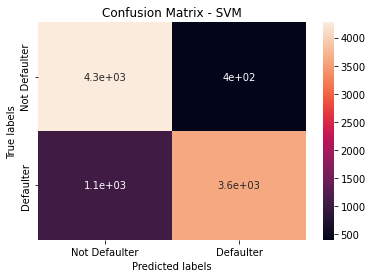

In [66]:
# Get the confusion matrix for Support Vector Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_test, y_pred_svm )
print(cm_svm)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVM')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Gradient Boosting

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [69]:
#class prediction of y
y_pred_gbc=gbc.predict(X_test)
y_train_pred_gbc=gbc.predict(X_train)

In [70]:
#getting the scores for Gradient Boosting Classifier
train_accuracy_gbc = round(accuracy_score(y_train_pred_gbc,y_train), 2)
print("The accuracy on train data is ", train_accuracy_gbc)

accuracy_gbc = round(accuracy_score(y_pred_gbc,y_test), 2)
print("The accuracy on test data is ", accuracy_gbc)

precision_score_gbc = round(precision_score(y_pred_gbc,y_test), 2)
print("The precision on test data is ", precision_score_gbc)

recall_score_gbc = round(recall_score(y_pred_gbc,y_test), 2)
print("The recall on test data is ", recall_score_gbc)

f1_score_gbc = round(f1_score(y_pred_gbc,y_test), 2)
print("The f1 on test data is ", f1_score_gbc)

roc_score_gbc = round(roc_auc_score(y_pred_gbc,y_test), 2)
print("The roc_score on test data is ", roc_score_gbc)

The accuracy on train data is  0.85
The accuracy on test data is  0.85
The precision on test data is  0.8
The recall on test data is  0.88
The f1 on test data is  0.84
The roc_score on test data is  0.85


[[4160  513]
 [ 924 3749]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

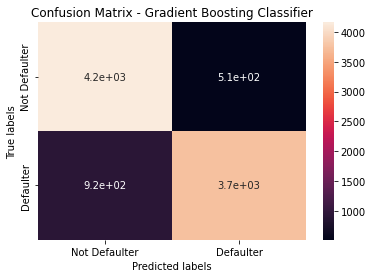

In [71]:
# Get the confusion matrix for Gradient Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_gbc = confusion_matrix(y_test, y_pred_gbc )
print(cm_gbc)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_gbc, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Gradient Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

XG Boosting

In [72]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [74]:
#class prediction of y
y_pred_xgb=xgb.predict(X_test)
y_train_pred_xgb=xgb.predict(X_train)

In [75]:
#getting the scores for XG Boosting Classifier
train_accuracy_xgb = round(accuracy_score(y_train_pred_xgb,y_train), 2)
print("The accuracy on train data is ", train_accuracy_xgb)

accuracy_xgb = round(accuracy_score(y_pred_xgb,y_test), 2)
print("The accuracy on test data is ", accuracy_xgb)

precision_score_xgb = round(precision_score(y_pred_xgb,y_test), 2)
print("The precision on test data is ", precision_score_xgb)

recall_score_xgb = round(recall_score(y_pred_xgb,y_test), 2)
print("The recall on test data is ", recall_score_xgb)

f1_score_xgb = round(f1_score(y_pred_xgb,y_test), 2)
print("The f1 on test data is ", f1_score_xgb)

roc_score_xgb = round(roc_auc_score(y_pred_xgb,y_test), 2)
print("The roc_score on test data is ", roc_score_xgb)

The accuracy on train data is  0.85
The accuracy on test data is  0.85
The precision on test data is  0.8
The recall on test data is  0.88
The f1 on test data is  0.84
The roc_score on test data is  0.85


[[4169  504]
 [ 931 3742]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

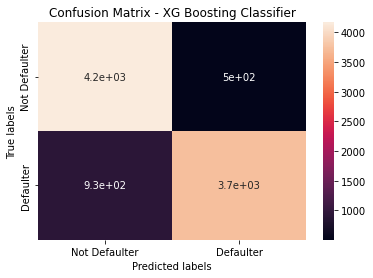

In [76]:
# Get the confusion matrix for XG Boosting Classifier
labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_test, y_pred_xgb )
print(cm_xgb)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - XG Boosting Classifier')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

Baseline Model Comparision

In [77]:
all_lassifiers = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'XG Boosting']
all_train_accuracy = [train_accuracy_logi, train_accuracy_dtc, train_accuracy_rfc, train_accuracy_svm, train_accuracy_gbc, train_accuracy_xgb]
all_test_accuracy = [accuracy_logi, accuracy_dtc, accuracy_rfc, accuracy_svm, accuracy_gbc, accuracy_xgb]
all_precision_score = [precision_score_logi, precision_score_dtc, precision_score_rfc, precision_score_svm, precision_score_gbc, precision_score_xgb]
all_recall_score = [recall_score_logi, recall_score_dtc, recall_score_rfc, recall_score_svm, recall_score_gbc, recall_score_xgb]
all_f1_score = [f1_score_logi, f1_score_dtc, f1_score_rfc, f1_score_svm, f1_score_gbc, f1_score_xgb]
all_auc_score = [roc_score_logi, roc_score_dtc, roc_score_rfc, roc_score_svm, roc_score_gbc, roc_score_xgb]

In [78]:
compare_df = pd.DataFrame({'Classifier':all_lassifiers, 'Train Accuracy': all_train_accuracy, 'Test Accuracy': all_test_accuracy, 'Precision': all_precision_score, 'Recall': all_recall_score, 'F1 Score': all_f1_score , 'AUC': all_auc_score})
compare_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.83,0.83,0.80,0.86,0.83,0.83
1,Decision Tree,1.00,0.80,0.82,0.79,0.80,0.80
2,Random Forest,1.00,0.87,0.83,0.90,0.86,0.87
3,SVM,0.85,0.84,0.77,0.90,0.83,0.85
4,Gradient Boosting,0.85,0.85,0.80,0.88,0.84,0.85
5,XG Boosting,0.85,0.85,0.80,0.88,0.84,0.85


In [79]:
compare_df.sort_values(by=['Test Accuracy'], ascending=False)

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
2,Random Forest,1.00,0.87,0.83,0.90,0.86,0.87
4,Gradient Boosting,0.85,0.85,0.80,0.88,0.84,0.85
5,XG Boosting,0.85,0.85,0.80,0.88,0.84,0.85
3,SVM,0.85,0.84,0.77,0.90,0.83,0.85
0,Logistic Regression,0.83,0.83,0.80,0.86,0.83,0.83
1,Decision Tree,1.00,0.80,0.82,0.79,0.80,0.80


Here we see Random forest classifier shows the highest test accuracy and F1 score

Combined ROC curve for all the models

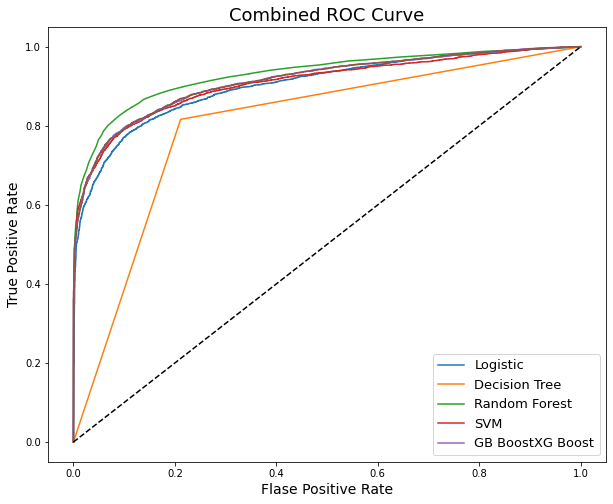

In [81]:
from sklearn.metrics import roc_curve

#probabilty prediction of y for all model
y_pred_proba_logi = logi.predict_proba(X_test)[:,1]
y_pred_proba_dtc = dtc.predict_proba(X_test)[:,1]
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]
y_pred_proba_svm = svm.predict_proba(X_test)[:,1]
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]
y_pred_proba_xgb = xgb.predict_proba(X_test)[:,1]
fig = plt.figure(figsize=(10,8)) 

fpr_logi, tpr_logi, _logi = roc_curve(y_test,  y_pred_proba_logi)
fpr_dtc, tpr_dtc, _dtc = roc_curve(y_test,  y_pred_proba_dtc)
fpr_rfc, tpr_rfc, _rfc = roc_curve(y_test,  y_pred_proba_rfc)
fpr_svm, tpr_svm, _svm = roc_curve(y_test,  y_pred_proba_svm)
fpr_gbc, tpr_gbc, _gbc = roc_curve(y_test,  y_pred_proba_gbc)
fpr_xgb, tpr_xgb, _xgb = roc_curve(y_test,  y_pred_proba_xgb)

plt.plot(fpr_logi, tpr_logi)
plt.plot(fpr_dtc, tpr_dtc)
plt.plot(fpr_rfc, tpr_rfc)
plt.plot(fpr_svm, tpr_svm)
plt.plot(fpr_gbc, tpr_gbc)
plt.plot(fpr_xgb, tpr_xgb)

plt.plot([0,1], [0,1], color='black', linestyle='--')

plt.xlabel("Flase Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title('Combined ROC Curve', fontsize=18)

plt.legend(["Logistic", "Decision Tree", "Random Forest", "SVM", "GB Boost" "XG Boost"], prop={'size':13}, loc='lower right' )

Feature Importance On Random Forest Model

In [82]:
features = list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter')

In [83]:
feature_importances_rfc = rfc.feature_importances_

In [84]:
feature_importances_rfc_df = pd.Series(feature_importances_rfc, index=features)

In [86]:
round(feature_importances_rfc_df.sort_values(ascending=False)[0:15], 2)

PAY_SEPT_0       0.08
LIMIT_BAL        0.05
BILL_AMT_SEPT    0.05
BILL_AMT_JUL     0.04
BILL_AMT_AUG     0.04
PAY_AMT_SEPT     0.04
AGE              0.04
BILL_AMT_JUN     0.04
PAY_AMT_AUG      0.04
BILL_AMT_APR     0.04
BILL_AMT_MAY     0.04
PAY_AMT_JUL      0.04
PAY_AMT_APR      0.03
PAY_AMT_JUN      0.03
PAY_AMT_MAY      0.03
dtype: float64

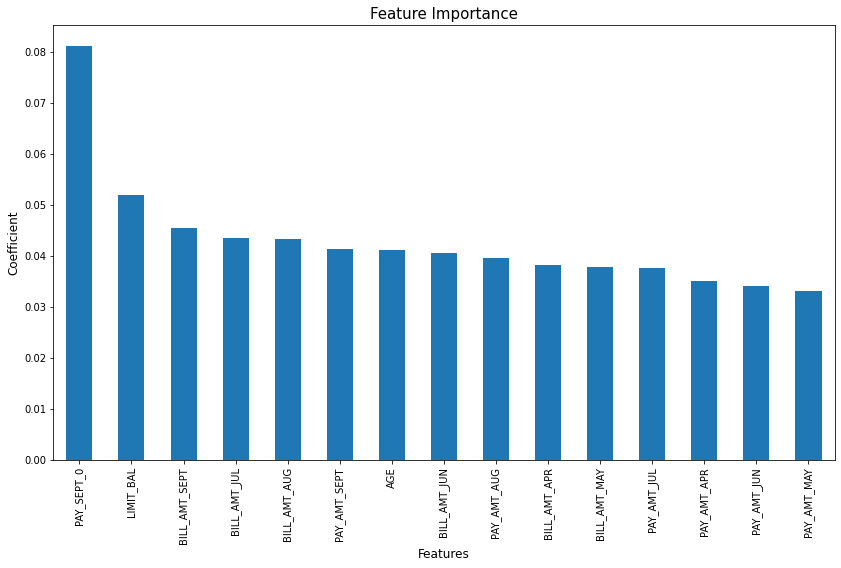

In [88]:
fig = plt.figure(figsize=(14,8)) 
feature_importances_rfc_df.nlargest(15).plot(kind='bar')
plt.xlabel("Features", fontsize=12)
plt.ylabel("Coefficient", fontsize=12)
plt.title('Feature Importance', fontsize=15)
plt.show()

The above plot shows 15 features are the most important features of random forest classifier.

Cross Validation & Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV

Logistic Regression Model

In [91]:
# penalty in Logistic Regression Classifier
penalties = ['l1','l2', 'elasticnet', 'none']

# hyperparameter C
C= [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5, 10]

# Hyperparameter Grid
param_dict = {'penalty':penalties,
              'max_iter' : [100, 1000,2500, 5000],
              'C' : C }

In [94]:
# Create an instance of the Logistic Regression
logi = LogisticRegression()

# Grid search
logi_grid = GridSearchCV(estimator=logi,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
logi_grid.fit(X_train,y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 0.5, 0.75, 1, 1.25, 1.5, 5,
                               10],
                         'max_iter': [100, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='roc_auc', verbose=3)

In [98]:
logi_grid.best_estimator_

LogisticRegression(C=0.1)

In [99]:
logi_grid.best_params_

{'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}

In [100]:
logi_optimal_model = logi_grid.best_estimator_

In [101]:
#class prediction of y on train and test
y_pred_logi_grid = logi_optimal_model.predict(X_test)
y_train_pred_logi_grid = logi_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_logi_grid = logi_optimal_model.predict_proba(X_test)[:,1]

In [102]:
#getting the scores for Logistic Regression after CV and Hyperparameter Tunning
train_accuracy_logi_grid = round(accuracy_score(y_train_pred_logi_grid,y_train), 2)
print("The accuracy on train data is ", train_accuracy_logi_grid)

accuracy_logi_grid = round(accuracy_score(y_pred_logi_grid,y_test), 2)
print("The accuracy on test data is ", accuracy_logi_grid)

precision_score_logi_grid = round(precision_score(y_pred_logi_grid, y_test), 2)
print("The precision on test data is ", precision_score_logi_grid)

recall_score_logi_grid = round(recall_score(y_pred_logi_grid,y_test), 2)
print("The recall on test data is ", recall_score_logi_grid)

f1_score_logi_grid = round(f1_score(y_pred_logi_grid,y_test), 2)
print("The f1 on test data is ", f1_score_logi_grid)

auc_logi_grid = round(roc_auc_score(y_pred_logi_grid,y_test), 2)
print("The auc on test data is ", auc_logi_grid)

The accuracy on train data is  0.83
The accuracy on test data is  0.83
The precision on test data is  0.8
The recall on test data is  0.86
The f1 on test data is  0.83
The auc on test data is  0.83


In [117]:
# Get the confusion matrices for train and test
train_cm_logi_grid = confusion_matrix(y_train,y_train_pred_logi_grid)
train_cm_logi_grid

array([[16211,  2480],
       [ 3977, 14714]])

In [118]:
test_cm_logi_grid = confusion_matrix(y_test,y_pred_logi_grid)
test_cm_logi_grid

array([[4050,  623],
       [ 939, 3734]])

Decision Tree Classification

In [106]:
# The maximum depth of the tree
depth_of_tree = [20,25,30,35]

# The minimum number of samples required to split an internal node
min_samples_split = [0.001,0.01,0.05]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50,60]

# Hyperparameter Grid
param_dict = {'max_depth': depth_of_tree,
              'min_samples_split':min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [107]:
# Create an instance of the decision tree
dtc = DecisionTreeClassifier()

# Grid search
dtc_grid = GridSearchCV(estimator=dtc,
                       param_grid = param_dict,
                       cv = 5, verbose=3, n_jobs = -1, scoring='roc_auc')
# fitting model
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 25, 30, 35],
                         'min_samples_leaf': [40, 50, 60],
                         'min_samples_split': [0.001, 0.01, 0.05]},
             scoring='roc_auc', verbose=3)

In [108]:
dtc_grid.best_estimator_

DecisionTreeClassifier(max_depth=25, min_samples_leaf=40,
                       min_samples_split=0.001)

In [109]:
dtc_grid.best_params_

{'max_depth': 25, 'min_samples_leaf': 40, 'min_samples_split': 0.001}

In [110]:
dtc_optimal_model = dtc_grid.best_estimator_

In [111]:
#class prediction of y on train and test
y_pred_dtc_grid=dtc_optimal_model.predict(X_test)
y_train_pred_dtc_grid=dtc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_dtc_grid = dtc_optimal_model.predict_proba(X_test)[:,1]

In [112]:
#getting all scores for decision tree after CV and Hyperparameter Tunning
train_accuracy_dtc_grid = round(accuracy_score(y_train_pred_dtc_grid,y_train), 2)
print("The accuracy on train data is ", train_accuracy_dtc_grid)

accuracy_dtc_grid = round(accuracy_score(y_pred_dtc_grid,y_test), 2)
print("The accuracy on test data is ", accuracy_dtc_grid)

precision_score_dtc_grid = round(precision_score(y_pred_dtc_grid,y_test), 2)
print("The precision on test data is ", precision_score_dtc_grid)

recall_score_dtc_grid = round(recall_score(y_pred_dtc_grid,y_test), 2)
print("The recall on test data is ", recall_score_dtc_grid)

f1_score_dtc_grid = round(f1_score(y_pred_dtc_grid,y_test), 2)
print("The f1 on test data is ", f1_score_dtc_grid)

auc_dtc_grid = round(roc_auc_score(y_pred_dtc_grid,y_test), 2)
print("The auc on test data is ", auc_dtc_grid)

The accuracy on train data is  0.84
The accuracy on test data is  0.82
The precision on test data is  0.78
The recall on test data is  0.85
The f1 on test data is  0.81
The auc on test data is  0.82


In [115]:
# Get the confusion matrices for train and test
train_cm_dtc_grid = confusion_matrix(y_train,y_train_pred_dtc_grid)
train_cm_dtc_grid

array([[16598,  2093],
       [ 3779, 14912]])

In [152]:
test_cm_dtc_grid = confusion_matrix(y_test,y_pred_dtc_grid)
test_cm_dtc_grid

array([[4016,  657],
       [1009, 3664]])

Support Vector Machine

In [119]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter Grid
param_dict = {'C':[1, 10] ,
              'kernel': ['rbf']}

In [121]:
# Create an instance of the support vector classifier
svm=SVC(probability=True)

# Grid search
svm_grid = RandomizedSearchCV(estimator = svm, param_distributions = param_dict,
                       cv = 2, verbose=2, n_jobs = -1, scoring= 'roc_auc')
# fitting model
svm_grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2, estimator=SVC(probability=True), n_jobs=-1,
                   param_distributions={'C': [1, 10], 'kernel': ['rbf']},
                   scoring='roc_auc', verbose=2)

In [122]:
svm_grid.best_estimator_

SVC(C=1, probability=True)

In [123]:
svm_grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [124]:
svm_optimal_model = svm_grid.best_estimator_

In [125]:
#class prediction of y on train and test
y_pred_svm_grid=svm_optimal_model.predict(X_test)
y_train_pred_svm_grid=svm_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_svm_grid = svm_optimal_model.predict_proba(X_test)[:,1]

In [126]:
#getting the scores for Support Vector Classifier after CV and Hyperparameter Tunning
train_accuracy_svm_grid = round(accuracy_score(y_train_pred_svm_grid,y_train), 2)
print("The accuracy on train data is ", train_accuracy_svm_grid)

accuracy_svm_grid = round(accuracy_score(y_pred_svm_grid,y_test), 2)
print("The accuracy on test data is ", accuracy_svm_grid)

precision_score_svm_grid = round(precision_score(y_pred_svm_grid,y_test), 2)
print("The precision on test data is ", precision_score_svm_grid)

recall_score_svm_grid = round(recall_score(y_pred_svm_grid,y_test), 2)
print("The recall on test data is ", recall_score_svm_grid)

f1_score_svm_grid = round(f1_score(y_pred_svm_grid,y_test), 2)
print("The f1 on test data is ", f1_score_svm_grid)

auc_svm_grid = round(roc_auc_score(y_pred_svm_grid,y_test), 2)
print("The auc on test data is ", auc_svm_grid)

The accuracy on train data is  0.85
The accuracy on test data is  0.84
The precision on test data is  0.77
The recall on test data is  0.9
The f1 on test data is  0.83
The auc on test data is  0.85


In [127]:
# Get the confusion matrices for train and test
train_cm_svm_grid = confusion_matrix(y_train,y_train_pred_svm_grid)
train_cm_svm_grid

array([[17335,  1356],
       [ 4370, 14321]])

In [151]:
test_cm_svm_grid = confusion_matrix(y_test,y_pred_svm_grid)
test_cm_svm_grid

array([[4271,  402],
       [1056, 3617]])

Random Forest Classifer

In [129]:
# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [130]:
# Create an instance of the RandomForestClassifier
rfc = RandomForestClassifier()

# Grid search
rfc_grid = GridSearchCV(estimator=rfc,
                       param_grid = param_dict,
                       cv = 5, verbose=2, scoring='roc_auc')
# fitting model
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.7s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.6s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   6.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   5.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   6.5s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=   8.4s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=  13.0s
[CV] END max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=150; total time=  10.1s
[CV] END ma

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [100, 150, 200]},
             scoring='roc_auc', verbose=2)

In [131]:
rfc_grid.best_estimator_

RandomForestClassifier(max_depth=20, min_samples_leaf=40, min_samples_split=50,
                       n_estimators=200)

In [132]:
rfc_grid.best_params_

{'max_depth': 20,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 200}

In [133]:
rfc_optimal_model = rfc_grid.best_estimator_

In [134]:
#class prediction of y on train and test
y_pred_rfc_grid=rfc_optimal_model.predict(X_test)
y_train_pred_rfc_grid=rfc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_rfc_grid = rfc_optimal_model.predict_proba(X_test)[:,1]

In [135]:
#getting the scores for Random Forest Classifier after CV and Hyperparameter Tunning
train_accuracy_rfc_grid = round(accuracy_score(y_train_pred_rfc_grid,y_train), 2)
print("The accuracy on train data is ", train_accuracy_rfc_grid)

accuracy_rfc_grid = round(accuracy_score(y_pred_rfc_grid,y_test), 2)
print("The accuracy on test data is ", accuracy_rfc_grid)

precision_score_rfc_grid = round(precision_score(y_pred_rfc_grid,y_test), 2)
print("The precision on test data is ", precision_score_rfc_grid)

recall_score_rfc_grid = round(recall_score(y_pred_rfc_grid,y_test), 2)
print("The recall on test data is ", recall_score_rfc_grid)

f1_score_rfc_grid = round(f1_score(y_pred_rfc_grid,y_test), 2)
print("The f1 on test data is ", f1_score_rfc_grid)

auc_rfc_grid = round(roc_auc_score(y_pred_rfc_grid,y_test), 2)
print("The auc on test data is ", auc_rfc_grid)

The accuracy on train data is  0.84
The accuracy on test data is  0.84
The precision on test data is  0.8
The recall on test data is  0.86
The f1 on test data is  0.83
The auc on test data is  0.84


In [136]:
# Get the confusion matrices for train and test
train_cm_rfc_grid = confusion_matrix(y_train,y_train_pred_rfc_grid)
train_cm_rfc_grid

array([[16552,  2139],
       [ 3744, 14947]])

In [137]:
test_cm_rfc_grid = confusion_matrix(y_test,y_pred_rfc_grid)
test_cm_rfc_grid

array([[4078,  595],
       [ 936, 3737]])

Gradient Boosting

In [138]:
# to shrinks the contribution of each tree by learning_rate
learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Number of trees
n_estimators = [100,150,200]

# Maximum depth of trees
max_depth = [10,20,30]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
param_dict = {'learning_rate': learning_rates,
              'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [139]:
# Create an instance of the RandomForestClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Grid search
gbc_grid = RandomizedSearchCV(estimator=gbc,
                       param_distributions = param_dict,
                       cv = 2, verbose=2, scoring='roc_auc')
# fitting model
gbc_grid.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time= 1.7min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=50, min_samples_split=50, n_estimators=150; total time= 1.2min
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=  50.3s
[CV] END learning_rate=1, max_depth=20, min_samples_leaf=40, min_samples_split=100, n_estimators=100; total time=  50.9s
[CV] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=  32.0s
[CV] END learning_rate=0.01, max_depth=20, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time=  32.7s
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=40, min_samples_split=50, n_estimators=200; total time=  55.1s
[CV] END learning_rate=0.01, max_depth=10, min_samples_leaf=40, min_samples_split=

RandomizedSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'max_depth': [10, 20, 30],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [100, 150, 200]},
                   scoring='roc_auc', verbose=2)

In [140]:
gbc_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.05, max_depth=30,
                           min_samples_leaf=50, min_samples_split=100,
                           n_estimators=200, random_state=42)

In [141]:
gbc_grid.best_params_

{'learning_rate': 0.05,
 'max_depth': 30,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 200}

In [142]:
gbc_optimal_model = gbc_grid.best_estimator_

In [143]:
#class prediction of y on train and test
y_pred_gbc_grid=gbc_optimal_model.predict(X_test)
y_train_pred_gbc_grid=gbc_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_gbc_grid = gbc_optimal_model.predict_proba(X_test)[:,1]

In [147]:
#getting the scores for Gradient Boosting after CV and Hyperparameter Tunning
train_accuracy_gbc_grid = round(accuracy_score(y_train_pred_gbc_grid,y_train), 2)
print("The accuracy on train data is ", train_accuracy_gbc_grid)

accuracy_gbc_grid = round(accuracy_score(y_pred_gbc_grid,y_test), 2)
print("The accuracy on test data is ", accuracy_gbc_grid)

precision_score_gbc_grid = round(precision_score(y_pred_gbc_grid,y_test), 2)
print("The precision on test data is ", precision_score_gbc_grid)

recall_score_gbc_grid = round(recall_score(y_pred_gbc_grid,y_test), 2)
print("The recall on test data is ", recall_score_gbc_grid)

f1_score_gbc_grid = round(f1_score(y_pred_gbc_grid,y_test), 2)
print("The f1 on test data is ", f1_score_gbc_grid)

auc_gbc_grid = round(roc_auc_score(y_pred_gbc_grid,y_test), 2)
print("The auc on test data is ", auc_gbc_grid)

The accuracy on train data is  0.99
The accuracy on test data is  0.87
The precision on test data is  0.83
The recall on test data is  0.9
The f1 on test data is  0.86
The auc on test data is  0.87


In [148]:
# Get the confusion matrices for train and test
train_cm_gbc_grid = confusion_matrix(y_train,y_train_pred_gbc_grid)
train_cm_gbc_grid

array([[18623,    68],
       [  255, 18436]])

In [150]:
test_cm_gbc_grid = confusion_matrix(y_test,y_pred_gbc_grid)
test_cm_gbc_grid

array([[4248,  425],
       [ 788, 3885]])

XG Boosting

In [153]:
from sklearn.model_selection import RandomizedSearchCV

In [154]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [155]:
# Create an instance of the RandomForestClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [157]:
xgb_grid.best_estimator_

XGBClassifier(gamma=0.1, max_depth=25, min_samples_leaf=50, n_estimators=250)

In [156]:
xgb_grid.best_params_

{'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 25,
 'min_child_weight': 1,
 'min_samples_leaf': 50,
 'n_estimators': 250}

In [158]:
xgb_optimal_model = xgb_grid.best_estimator_

In [159]:
#class prediction of y on train and test
y_pred_xgb_grid=xgb_optimal_model.predict(X_test)
y_train_pred_xgb_grid=xgb_optimal_model.predict(X_train)

# Get the probabilities on train and test
y_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
y_train_pred_prob_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [160]:
#getting the scores for XG Boosting after CV and Hyperparameter Tunning
train_accuracy_xgb_grid = round(accuracy_score(y_train_pred_xgb_grid,y_train), 2)
print("The accuracy on train data is ", train_accuracy_xgb_grid)

accuracy_xgb_grid = round(accuracy_score(y_pred_xgb_grid,y_test), 2)
print("The accuracy on test data is ", accuracy_xgb_grid)

precision_score_xgb_grid = round(precision_score(y_pred_xgb_grid,y_test), 2)
print("The precision on test data is ", precision_score_xgb_grid)

recall_score_xgb_grid = round(recall_score(y_pred_xgb_grid,y_test), 2)
print("The recall on test data is ", recall_score_xgb_grid)

f1_score_xgb_grid = round(f1_score(y_pred_xgb_grid,y_test), 2)
print("The f1 on test data is ", f1_score_xgb_grid)

auc_xgb_grid = round(roc_auc_score(y_pred_xgb_grid,y_test), 2)
print("The auc on test data is ", auc_xgb_grid)

The accuracy on train data is  1.0
The accuracy on test data is  0.87
The precision on test data is  0.84
The recall on test data is  0.9
The f1 on test data is  0.87
The auc on test data is  0.88


In [161]:
# Get the confusion matrices for train and test
train_cm_xgb_grid = confusion_matrix(y_train,y_train_pred_xgb_grid)
train_cm_xgb_grid

array([[18684,     7],
       [   15, 18676]])

In [163]:
test_cm_xgb_grid = confusion_matrix(y_test,y_pred_xgb_grid )
test_cm_xgb_grid

array([[4246,  427],
       [ 754, 3919]])

Final Model Comparision

In [164]:
grid_classifiers = ['Optimal Logistic Regression', 'Optimal Decision Tree', 'Optimal Random Forest', 'Optimal SVM', 'Optimal Gradient Boosting', 'Optimal XG Boosting']
grid_train_accuracy = [train_accuracy_logi_grid, train_accuracy_dtc_grid, train_accuracy_rfc_grid, train_accuracy_svm_grid, train_accuracy_gbc_grid, train_accuracy_xgb_grid]
grid_test_accuracy = [accuracy_logi_grid, accuracy_dtc_grid, accuracy_rfc_grid, accuracy_svm_grid, accuracy_gbc_grid, accuracy_xgb_grid]
grid_precision_score = [precision_score_logi_grid, precision_score_dtc_grid, precision_score_rfc_grid, precision_score_svm_grid, precision_score_gbc_grid, precision_score_xgb_grid]
grid_recall_score = [recall_score_logi_grid, recall_score_dtc_grid, recall_score_rfc_grid, recall_score_svm_grid, recall_score_gbc_grid, recall_score_xgb_grid]
grid_f1_score = [f1_score_logi_grid, f1_score_dtc_grid, f1_score_rfc_grid, f1_score_svm_grid, f1_score_gbc_grid, f1_score_xgb_grid]
grid_auc_score = [auc_logi_grid, auc_dtc_grid, auc_rfc_grid, auc_svm_grid, auc_gbc_grid, auc_xgb_grid]

In [165]:
grid_compare_df = pd.DataFrame({'Classifier':grid_classifiers, 'Train Accuracy': grid_train_accuracy, 'Test Accuracy': grid_test_accuracy, 'Precision': grid_precision_score, 'Recall': grid_recall_score, 'F1 Score': grid_f1_score , 'AUC': grid_auc_score})

In [168]:
all_comparision_df = pd.concat([compare_df, grid_compare_df]).reset_index()

In [169]:
all_comparision_df.drop('index', axis=1, inplace=True)

In [170]:
all_comparision_df.sort_values('AUC', axis=0, ascending=False, inplace=True)

In [171]:
all_comparision_df

,Classifier,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score,AUC
11,Optimal XG Boosting,1.00,0.87,0.84,0.90,0.87,0.88
2,Random Forest,1.00,0.87,0.83,0.90,0.86,0.87
10,Optimal Gradient Boosting,0.99,0.87,0.83,0.90,0.86,0.87
3,SVM,0.85,0.84,0.77,0.90,0.83,0.85
4,Gradient Boosting,0.85,0.85,0.80,0.88,0.84,0.85
5,XG Boosting,0.85,0.85,0.80,0.88,0.84,0.85
9,Optimal SVM,0.85,0.84,0.77,0.90,0.83,0.85
8,Optimal Random Forest,0.84,0.84,0.80,0.86,0.83,0.84
0,Logistic Regression,0.83,0.83,0.80,0.86,0.83,0.83
6,Optimal Logistic Regression,0.83,0.83,0.80,0.86,0.83,0.83


Conclusion

*   From all baseline model, Random forest classifier shows highest test accuracy and F1 score and AUC.
*   Baseline model of Random forest and decision tree shows huge difference in train and test accuracy which shows overfitting.
*   Cross validation and hyperparameter tunning certainly reduces chances of overfitting and also increases performance of model.
*   After cross validation and hyperparameter tunning, XG Boost shows highest test accuracy score of 87% and AUC is 88

